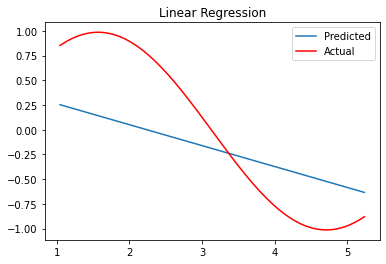

SSE for degree 1:  75.39005121879694
Coefficients for degree 1:  [ 0.47485524 -0.21180895]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

deg = np.array([i for i in range(60, 301)])
x = np.radians(deg)
k = np.random.normal(0, 0.15, 1)
y = np.sin(x) + k


def nonlinear_gradient_descent(X_train, y_train, X_test, learning_rate, epochs, degree):
    if degree == 1:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train]
        X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    elif degree == 3:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train ** 2, X_train ** 3]
        X_test = np.c_[np.ones(X_test.shape[0]), X_test, X_test ** 2, X_test ** 3]

    elif degree == 6:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train ** 2, X_train ** 3, X_train ** 4, X_train ** 5, X_train ** 6]
        X_test = np.c_[np.ones(X_test.shape[0]), X_test, X_test ** 2, X_test ** 3, X_test ** 4, X_test ** 5, X_test ** 6]

    elif degree == 9:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train ** 2, X_train ** 3, X_train ** 4, X_train ** 5, X_train ** 6, X_train ** 7, X_train ** 8, X_train ** 9]
        X_test = np.c_[np.ones(X_test.shape[0]), X_test, X_test ** 2, X_test ** 3, X_test ** 4, X_test ** 5, X_test ** 6, X_test ** 7, X_test ** 8, X_test ** 9]
    
    elif degree == 12:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train ** 2, X_train ** 3, X_train ** 4, X_train ** 5, X_train ** 6, X_train ** 7, X_train ** 8, X_train ** 9, X_train ** 10, X_train ** 11, X_train ** 12]
        X_test = np.c_[np.ones(X_test.shape[0]), X_test, X_test ** 2, X_test ** 3, X_test ** 4, X_test ** 5, X_test ** 6, X_test ** 7, X_test ** 8, X_test ** 9, X_test ** 10, X_test ** 11, X_test ** 12]

    elif degree == 15:
        X_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train ** 2, X_train ** 3, X_train ** 4, X_train ** 5, X_train ** 6, X_train ** 7, X_train ** 8, X_train ** 9, X_train ** 10, X_train ** 11, X_train ** 12, X_train ** 13, X_train ** 14, X_train ** 15]
        X_test = np.c_[np.ones(X_test.shape[0]), X_test, X_test ** 2, X_test ** 3, X_test ** 4, X_test ** 5, X_test ** 6, X_test ** 7, X_test ** 8, X_test ** 9, X_test ** 10, X_test ** 11, X_test ** 12, X_test ** 13, X_test ** 14, X_test ** 15]
    w = np.zeros(X_train.shape[1])
    for i in range(epochs):
        y_pred = X_train @ w
        w = w - learning_rate * (X_train.T @ (y_pred - y_train))
    y_pred = X_test @ w
    return y_pred, w

def reg_gradient_descend_l1(X_train, y_train, X_test, learning_rate, epochs, lamda):
    X_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train ** 2, X_train ** 3, X_train ** 4, X_train ** 5, X_train ** 6, X_train ** 7, X_train ** 8, X_train ** 9, X_train ** 10, X_train ** 11, X_train ** 12, X_train ** 13, X_train ** 14, X_train ** 15]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test, X_test ** 2, X_test ** 3, X_test ** 4, X_test ** 5, X_test ** 6, X_test ** 7, X_test ** 8, X_test ** 9, X_test ** 10, X_test ** 11, X_test ** 12, X_test ** 13, X_test ** 14, X_test ** 15]
    w = np.zeros(X_train.shape[1])
    for i in range(epochs):
        y_pred = X_train @ w
        if np.sum(w)>0:
            w = w - learning_rate * ((X_train.T @ (y_pred - y_train))+lamda/2)
        else:
            w = w - learning_rate * ((X_train.T @ (y_pred - y_train))-lamda/2)
    y_pred = X_test @ w
    return y_pred, w

def reg_gradient_descend_l2(X_train, y_train, X_test, learning_rate, epochs, lamda):
    X_train = np.c_[np.ones(X_train.shape[0]), X_train, X_train ** 2, X_train ** 3, X_train ** 4, X_train ** 5, X_train ** 6, X_train ** 7, X_train ** 8, X_train ** 9, X_train ** 10, X_train ** 11, X_train ** 12, X_train ** 13, X_train ** 14, X_train ** 15]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test, X_test ** 2, X_test ** 3, X_test ** 4, X_test ** 5, X_test ** 6, X_test ** 7, X_test ** 8, X_test ** 9, X_test ** 10, X_test ** 11, X_test ** 12, X_test ** 13, X_test ** 14, X_test ** 15]
    w = np.zeros(X_train.shape[1])
    for i in range(epochs):
        y_pred = X_train @ w
        w = w - learning_rate * ((X_train.T @ (y_pred - y_train))+lamda*w)
    y_pred = X_test @ w
    return y_pred, w

def sse(y_pred, y_test):
    return np.sum((y_pred - y_test) ** 2)

y_pred, w = nonlinear_gradient_descent(x, y, x, 0.0001, 100, 1)
plt.plot(x,y_pred)
plt.plot(x,y, color='red')
plt.legend(['Predicted', 'Actual'])
plt.title('Linear Regression')
plt.show()
print('SSE for degree 1: ', sse(y_pred, y))
print('Coefficients for degree 1: ', w)

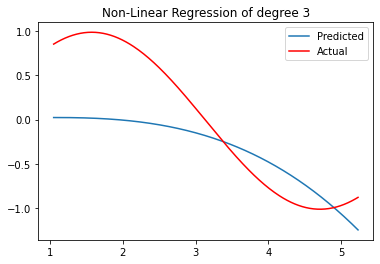

SSE for degree 3:  78.30533739055889
Coefficients for degree 3:  [ 0.00789525  0.01219994  0.01393964 -0.01185375]


In [2]:
y_pred, w = nonlinear_gradient_descent(x, y, x, 0.000001, 100, 3)
plt.plot(x,y_pred)
plt.plot(x,y, color='red')
plt.legend(['Predicted', 'Actual'])
plt.title('Non-Linear Regression of degree 3')
plt.show()
print('SSE for degree 3: ', sse(y_pred, y))
print('Coefficients for degree 3: ', w)

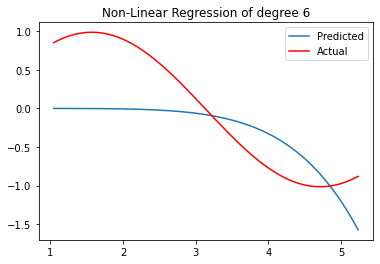

SSE for degree 6:  85.45901077663869
Coefficients for degree 6:  [ 6.56301308e-07  8.41946008e-07  4.25130545e-07 -2.94040197e-06
 -1.65603890e-05 -5.33191013e-05 -6.55313498e-05]


In [3]:
y_pred, w = nonlinear_gradient_descent(x, y, x, 0.0000000001, 100, 6)
plt.plot(x,y_pred)
plt.plot(x,y, color='red')
plt.legend(['Predicted', 'Actual'])
plt.title('Non-Linear Regression of degree 6')
plt.show()
print('SSE for degree 6: ', sse(y_pred, y))
print('Coefficients for degree 6: ', w)

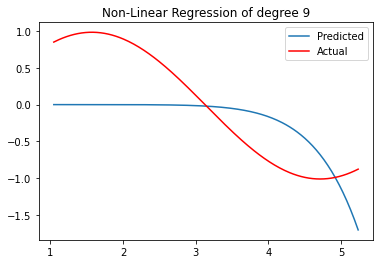

SSE for degree 9:  95.72862088749346
Coefficients for degree 9:  [ 4.96698018e-11  2.07084500e-11 -2.15920515e-10 -1.36511136e-09
 -6.15829188e-09 -2.44702110e-08 -8.86281498e-08 -2.85016948e-07
 -7.15023121e-07 -4.29749556e-07]


In [4]:
y_pred, w = nonlinear_gradient_descent(x, y, x, 0.00000000000001, 100, 9)
plt.plot(x,y_pred)
plt.plot(x,y, color='red')
plt.legend(['Predicted', 'Actual'])
plt.title('Non-Linear Regression of degree 9')
plt.show()
print('SSE for degree 9: ', sse(y_pred, y))
print('Coefficients for degree 9: ', w)

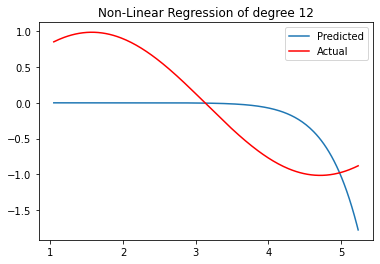

SSE for degree 12:  105.8271922439744
Coefficients for degree 12:  [ 3.69908008e-16 -3.52496654e-16 -4.66341796e-15 -2.49906141e-14
 -1.13452428e-13 -4.84061398e-13 -1.99939658e-12 -8.06205800e-12
 -3.17025658e-11 -1.20592428e-10 -4.35851919e-10 -1.43899237e-09
 -3.89058730e-09]


In [5]:
y_pred, w = nonlinear_gradient_descent(x, y, x, 0.0000000000000000001, 100, 12)
plt.plot(x,y_pred)
plt.plot(x,y, color='red')
plt.legend(['Predicted', 'Actual'])
plt.title('Non-Linear Regression of degree 12')
plt.show()
print('SSE for degree 12: ', sse(y_pred, y))
print('Coefficients for degree 12: ', w)

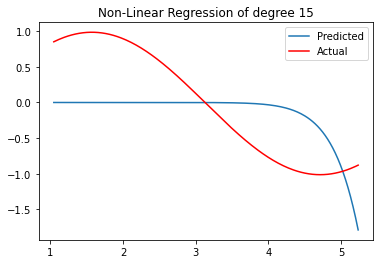

SSE for degree 15:  112.70017148398654
Coefficients for degree 15:  [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


In [6]:
y_pred, w = nonlinear_gradient_descent(x, y, x, 0.00000000000000000000001, 100, 15)
plt.plot(x,y_pred)
plt.plot(x,y, color='red')
plt.legend(['Predicted', 'Actual'])
plt.title('Non-Linear Regression of degree 15')
plt.show()
print('SSE for degree 15: ', sse(y_pred, y))
print('Coefficients for degree 15: ', w)

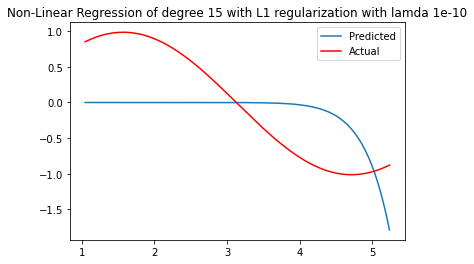

SSE for degree 15 with L1 regularization with lamda 1e-10 112.70017148398654
Coefficients for degree 15 with L1 regularization with lamda 1e-10 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


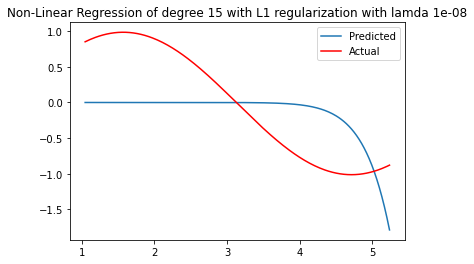

SSE for degree 15 with L1 regularization with lamda 1e-08 112.70017148398654
Coefficients for degree 15 with L1 regularization with lamda 1e-08 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


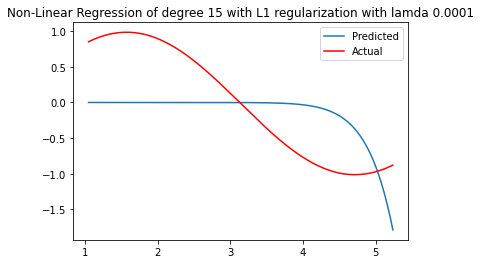

SSE for degree 15 with L1 regularization with lamda 0.0001 112.70017148398654
Coefficients for degree 15 with L1 regularization with lamda 0.0001 [ 3.04292165e-20 -6.49471052e-20 -6.01902201e-19 -3.12249831e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


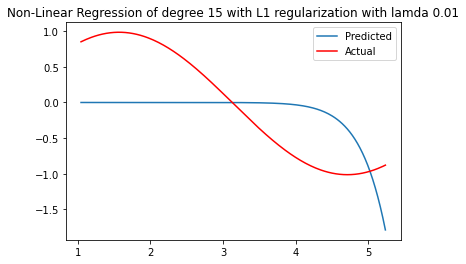

SSE for degree 15 with L1 regularization with lamda 0.01 112.70017148398662
Coefficients for degree 15 with L1 regularization with lamda 0.01 [ 3.04341665e-20 -6.49421552e-20 -6.01897251e-19 -3.12249336e-18
 -1.42313831e-17 -6.18459009e-17 -2.62853131e-16 -1.10210518e-15
 -4.56789419e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


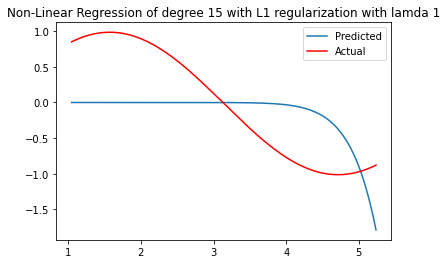

SSE for degree 15 with L1 regularization with lamda 1 112.70017148399575
Coefficients for degree 15 with L1 regularization with lamda 1 [ 3.09291665e-20 -6.44471552e-20 -6.01402251e-19 -3.12199836e-18
 -1.42308881e-17 -6.18454059e-17 -2.62852636e-16 -1.10210468e-15
 -4.56789370e-15 -1.86863370e-14 -7.51192200e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


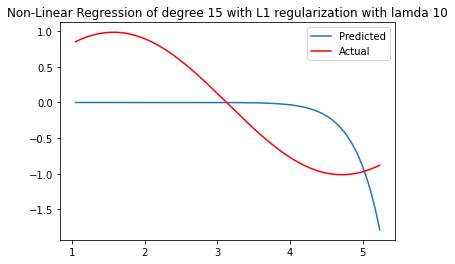

SSE for degree 15 with L1 regularization with lamda 10 112.70017148407868
Coefficients for degree 15 with L1 regularization with lamda 10 [ 3.54291665e-20 -5.99471552e-20 -5.96902251e-19 -3.11749836e-18
 -1.42263881e-17 -6.18409059e-17 -2.62848136e-16 -1.10210019e-15
 -4.56788920e-15 -1.86863325e-14 -7.51192155e-14 -2.94432016e-13
 -1.10976947e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


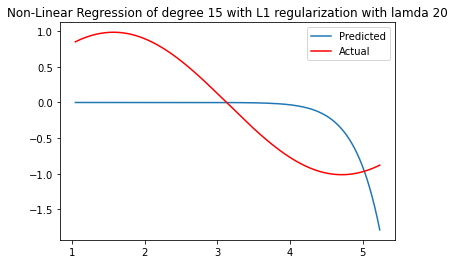

SSE for degree 15 with L1 regularization with lamda 20 112.70017148417082
Coefficients for degree 15 with L1 regularization with lamda 20 [ 4.04291665e-20 -5.49471552e-20 -5.91902251e-19 -3.11249836e-18
 -1.42213881e-17 -6.18359059e-17 -2.62843136e-16 -1.10209519e-15
 -4.56788420e-15 -1.86863275e-14 -7.51192105e-14 -2.94432011e-13
 -1.10976947e-12 -3.91710175e-12 -1.21724769e-11 -2.68792503e-11]


In [11]:
lamda = [1e-10,1e-8,1e-4,1e-2,1,10,20]
for l in lamda:
    y_pred,w = reg_gradient_descend_l1(x, y, x, 0.00000000000000000000001, 100, l)
    plt.plot(x,y_pred)
    plt.plot(x,y, color='red')
    plt.legend(['Predicted', 'Actual'])
    plt.title('Non-Linear Regression of degree 15 with L1 regularization with lamda '+str(l))
    plt.show()
    print('SSE for degree 15 with L1 regularization with lamda '+str(l), sse(y_pred, y))
    print('Coefficients for degree 15 with L1 regularization with lamda '+str(l), w)

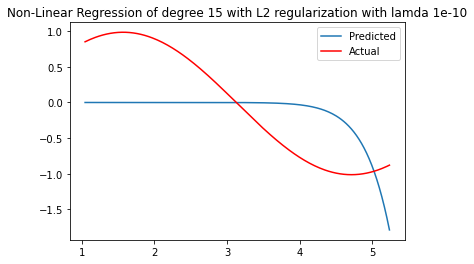

SSE for degree 15 with L2 regularization with lamda 1e-10 112.70017148398654
Coefficients for degree 15 with L2 regularization with lamda 1e-10 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


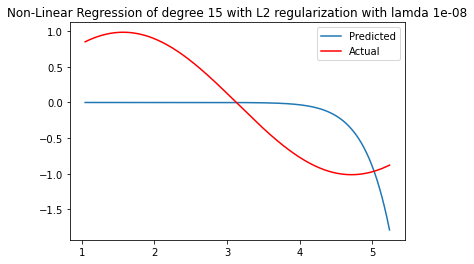

SSE for degree 15 with L2 regularization with lamda 1e-08 112.70017148398654
Coefficients for degree 15 with L2 regularization with lamda 1e-08 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


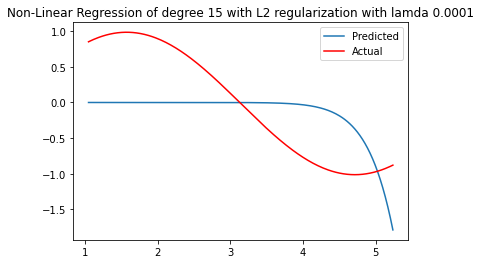

SSE for degree 15 with L2 regularization with lamda 0.0001 112.70017148398654
Coefficients for degree 15 with L2 regularization with lamda 0.0001 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


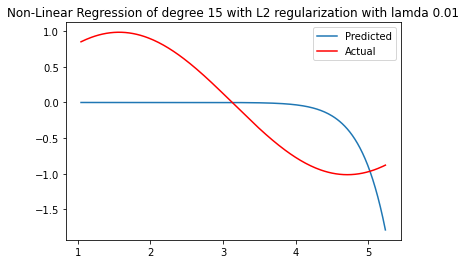

SSE for degree 15 with L2 regularization with lamda 0.01 112.70017148398654
Coefficients for degree 15 with L2 regularization with lamda 0.01 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


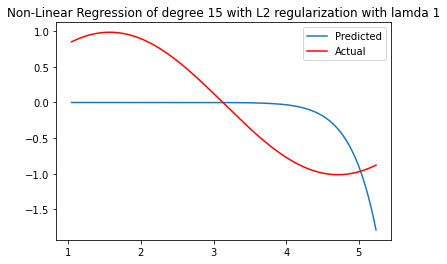

SSE for degree 15 with L2 regularization with lamda 1 112.70017148398654
Coefficients for degree 15 with L2 regularization with lamda 1 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


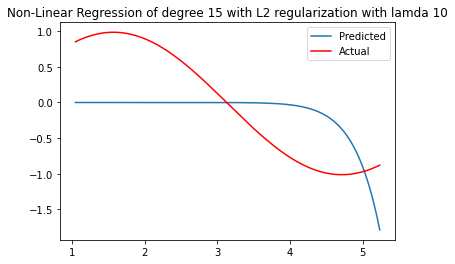

SSE for degree 15 with L2 regularization with lamda 10 112.70017148398654
Coefficients for degree 15 with L2 regularization with lamda 10 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


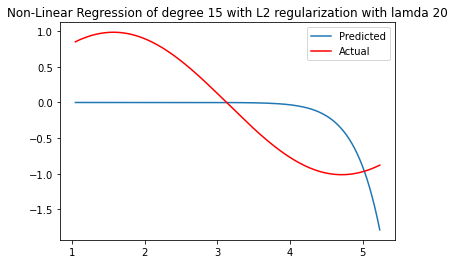

SSE for degree 15 with L2 regularization with lamda 20 112.70017148398654
Coefficients for degree 15 with L2 regularization with lamda 20 [ 3.04291665e-20 -6.49471552e-20 -6.01902251e-19 -3.12249836e-18
 -1.42313881e-17 -6.18459059e-17 -2.62853136e-16 -1.10210518e-15
 -4.56789420e-15 -1.86863375e-14 -7.51192205e-14 -2.94432021e-13
 -1.10976948e-12 -3.91710176e-12 -1.21724769e-11 -2.68792503e-11]


In [12]:
for l in lamda:
    y_pred,w = reg_gradient_descend_l2(x, y, x, 0.00000000000000000000001, 100, l)
    plt.plot(x,y_pred)
    plt.plot(x,y, color='red')
    plt.legend(['Predicted', 'Actual'])
    plt.title('Non-Linear Regression of degree 15 with L2 regularization with lamda '+str(l))
    plt.show()
    print('SSE for degree 15 with L2 regularization with lamda '+str(l), sse(y_pred, y))
    print('Coefficients for degree 15 with L2 regularization with lamda '+str(l), w)